In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.drop_duplicates(inplace=True) # removendo duplicadas

In [8]:
titanic.shape

(784, 15)

In [9]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:>

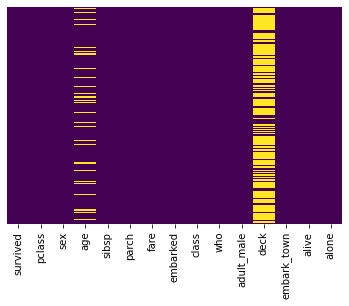

In [10]:
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [11]:
titanic.drop("deck", axis=1, inplace=True)
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

<AxesSubplot:>

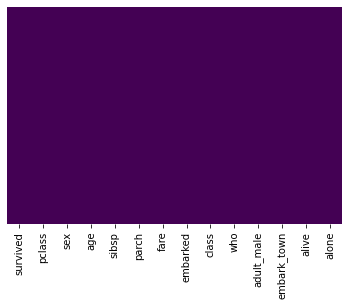

In [12]:
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [13]:
cols_dtypes = pd.DataFrame(titanic.dtypes).reset_index().rename(columns={"index": "columns", 0: "types"})
cat_colls = cols_dtypes[(cols_dtypes["types"] == "category")|( cols_dtypes["types"] == "object")| ( cols_dtypes["types"] == "bool")] 
cat_colls

,columns,types
2,sex,object
7,embarked,object
8,class,category
9,who,object
10,adult_male,bool
11,embark_town,object
12,alive,object
13,alone,bool


In [14]:
le = LabelEncoder()

cat_colls_lits = list(cat_colls["columns"])

for name in cat_colls_lits:
    titanic[name + "_encoded"] = le.fit_transform(titanic[name])
    titanic.drop(name, axis=1, inplace=True)

In [15]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded,class_encoded,who_encoded,adult_male_encoded,embark_town_encoded,alive_encoded,alone_encoded
0,0,3,22.0,1,0,7.2500,1,2,2,1,1,2,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,2,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,2,2,2,0,2,1,1
3,1,1,35.0,1,0,53.1000,0,2,0,2,0,2,1,0
4,0,3,35.0,0,0,8.0500,1,2,2,1,1,2,0,1


In [16]:
x = titanic.drop("survived", axis=1)
y = titanic["survived"]

In [17]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.3, random_state=42)

In [18]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [22]:
model = SVC(kernel="rbf", gamma=0.002, C=4.0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [23]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

<AxesSubplot:>

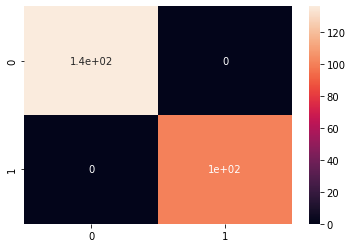

In [24]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True)

In [25]:
accuracy_score(y_test, y_pred)

1.0

In [26]:
precision_score(y_test, y_pred)

1.0

In [27]:
recall_score(y_test, y_pred)

1.0

In [28]:
f1_score(y_test, y_pred)

1.0

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

<AxesSubplot:>

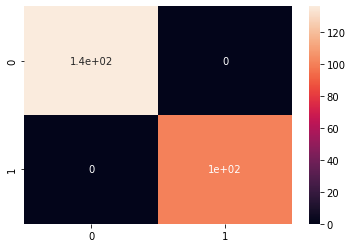

In [21]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True)